<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

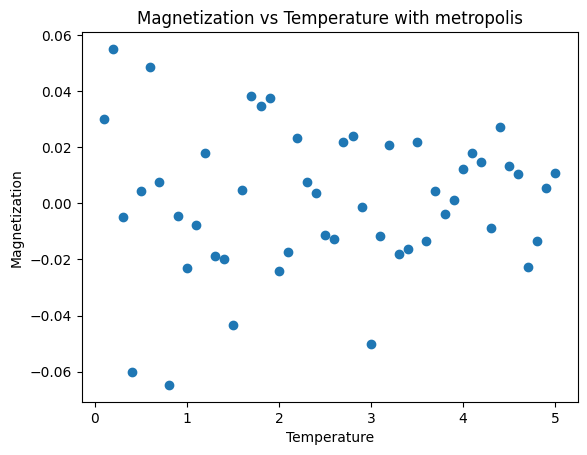

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

class IsingModel2D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        # 격자 내 스핀 상태를 무작위로 -1 또는 1로 초기화
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def energy(self):
        total_energy = 0
        # 각 스핀의 에너지 계산
        for i in range(self.size):
            for j in range(self.size):
                spin = self.spins[i, j]
                neighbor_sum = (
                    self.spins[(i+1)%self.size, j] +
                    self.spins[(i-1)%self.size, j] +
                    self.spins[i, (j+1)%self.size] +
                    self.spins[i, (j-1)%self.size]
                )
                # 교환 상호작용 항 추가
                total_energy += -self.exchange_interaction * spin * neighbor_sum
                # 외부 자기장과의 상호작용 항 추가
                total_energy += -self.external_field * spin
        return total_energy / 2  # Each bond is counted twice

    def metropolis_step(self):
        # 무작위로 스핀을 선택하여 에너지 변화 계산 후 스핀을 뒤집을지 결정
        i, j = random.randint(0, self.size-1), random.randint(0, self.size-1)
        spin = self.spins[i, j]
        neighbor_sum = (
            self.spins[(i+1)%self.size, j] +
            self.spins[(i-1)%self.size, j] +
            self.spins[i, (j+1)%self.size] +
            self.spins[i, (j-1)%self.size]
        )
        energy_change = 2 * spin * (self.exchange_interaction*neighbor_sum + self.external_field)

        # min(1, exp(-ΔE / T))을 기준으로 뒤집음
        if energy_change > 0 and random.random() < np.exp(-energy_change / self.temperature):
            spin *= -1  # 스핀을 뒤집음

        self.spins[i, j] = spin  # 수정된 스핀을 저장

    def simulate(self, steps, equilibration_steps=1000):
        magnetizations = []
        for step in range(steps):
            self.metropolis_step()
            if step >= equilibration_steps:  # 과도기 이후의 스텝에서만 자화를 계산
                magnetizations.append(np.mean(self.spins))
        return np.mean(magnetizations)  # 평균 자화 반환

# 모델 파라미터 설정
size = 20
external_field = 0
exchange_interaction = 1
steps = 10000
equilibration_steps = 1000  # 평형화에 필요한 스텝 수

# 온도를 변화시키면서 자화를 계산
temperatures = np.linspace(0.1, 5.0, 50)
magnetizations_vs_temperature = []

for temperature in temperatures:
    # 모델 생성
    ising_model = IsingModel2D(size, temperature, external_field, exchange_interaction)
    # 메트로폴리스 알고리즘으로 시뮬레이션 실행
    magnetization = ising_model.simulate(steps, equilibration_steps)
    # 결과 저장
    magnetizations_vs_temperature.append(magnetization)

# 그래프 그리기
plt.plot(temperatures, magnetizations_vs_temperature,marker='o',linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature with metropolis')
plt.show()


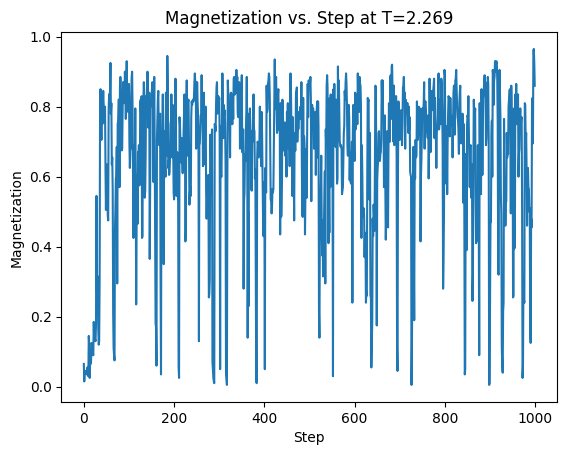

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class IsingModel2D:
    def __init__(self, size, temperature):
        self.size = size
        self.temperature = temperature
        self.spins = np.random.choice([-1, 1], size=(size, size))
        self.J = 1  # 교환 상호작용 상수
        self.cluster = np.zeros((size, size), dtype=bool)

    def _add_to_cluster(self, i, j):
        """주어진 스핀을 클러스터에 추가하고 인접 스핀을 검사하여 클러스터 확장"""
        if self.cluster[i, j]:
            return  # 이미 클러스터에 포함된 경우 반환

        self.cluster[i, j] = True  # 현재 스핀을 클러스터에 추가
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # 상하좌우 이동
        for di, dj in directions:
            ni, nj = (i + di) % self.size, (j + dj) % self.size  # 주기적 경계 조건
            if not self.cluster[ni, nj] and self.spins[i, j] == self.spins[ni, nj]:
                if random.random() < 1 - np.exp(-2 * self.J / self.temperature):
                    self._add_to_cluster(ni, nj)  # 재귀적으로 클러스터에 추가

    def wolff_step(self):
        """Wolff 알고리즘을 사용한 클러스터 뒤집기"""
        self.cluster.fill(False)  # 클러스터 초기화
        i, j = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
        self._add_to_cluster(i, j)  # 클러스터 생성 시작점

        # 클러스터에 포함된 모든 스핀 뒤집기
        self.spins[self.cluster] *= -1

    def simulate(self, steps):
        magnetizations = []
        for _ in range(steps):
            self.wolff_step()
            magnetization = np.abs(np.mean(self.spins))
            magnetizations.append(magnetization)
        return magnetizations

# 시뮬레이션 설정
size = 20
temperature = 2.269  # 임계 온도 근처
steps = 1000

model = IsingModel2D(size, temperature)
magnetizations = model.simulate(steps)

# 결과 그래프로 표시
plt.plot(magnetizations)
plt.xlabel('Step')
plt.ylabel('Magnetization')
plt.title('Magnetization vs. Step at T=2.269')
plt.show()


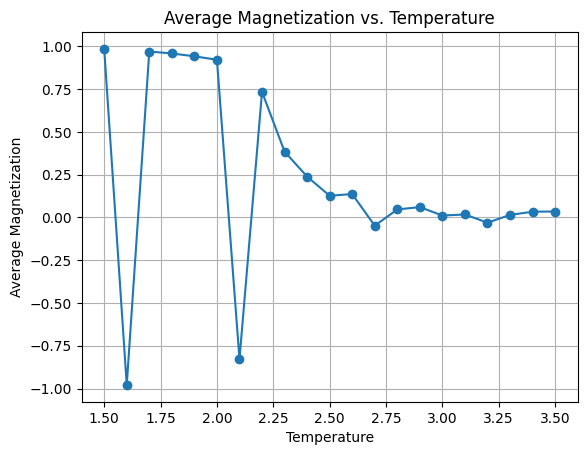

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class IsingModel2D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def calculate_energy_change(self, i, j):
        top = self.spins[(i-1)%self.size, j]
        bottom = self.spins[(i+1)%self.size, j]
        left = self.spins[i, (j-1)%self.size]
        right = self.spins[i, (j+1)%self.size]
        neighbor_sum = top + bottom + left + right

        # 교환 상호작용과 외부 자기장을 고려한 에너지 변화 계산
        delta_energy = 2 * self.spins[i, j] * (self.exchange_interaction * neighbor_sum + self.external_field)
        return delta_energy

    def metropolis_step(self):
        for _ in range(self.size**2):  # 격자 내 모든 스핀에 대해 한 번씩 시도
            i, j = random.randint(0, self.size-1), random.randint(0, self.size-1)
            delta_energy = self.calculate_energy_change(i, j)
            if delta_energy < 0 or random.random() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j] *= -1

    def simulate(self, steps, equilibration_steps=0):
        magnetizations = []
        for step in range(steps + equilibration_steps):
            self.metropolis_step()
            if step >= equilibration_steps:  # 평형화 단계 이후 자화 계산
                magnetization = np.mean(self.spins)
                magnetizations.append(magnetization)
        return magnetizations

# 시뮬레이션 매개변수
size = 20
temperatures = np.linspace(1.5, 3.5, 21)
external_field = 0.01  # 외부 자기장
exchange_interaction = 1  # 교환 상호작용 상수
steps = 1000
equilibration_steps = 1000

magnetizations_vs_temperature = []

for temperature in temperatures:
    model = IsingModel2D(size, temperature, external_field, exchange_interaction)
    magnetizations = model.simulate(steps, equilibration_steps)
    avg_magnetization = np.mean(magnetizations)
    magnetizations_vs_temperature.append(avg_magnetization)

# 그래프 그리기
plt.plot(temperatures, magnetizations_vs_temperature, marker='o',linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature')
plt.grid(True)
plt.show()


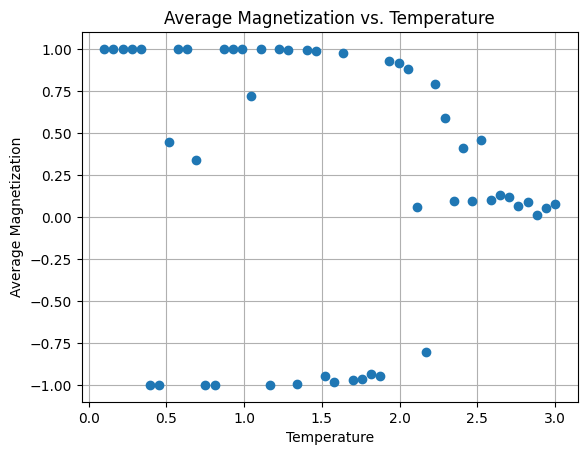

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class IsingModel2D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def calculate_energy_change(self, i, j):
        top = self.spins[(i-1)%self.size, j]
        bottom = self.spins[(i+1)%self.size, j]
        left = self.spins[i, (j-1)%self.size]
        right = self.spins[i, (j+1)%self.size]
        neighbor_sum = top + bottom + left + right

        # 교환 상호작용과 외부 자기장을 고려한 에너지 변화 계산
        delta_energy = 2 * self.spins[i, j] * (self.exchange_interaction * neighbor_sum + self.external_field)
        return delta_energy

    def metropolis_step(self):
        for _ in range(self.size**2):  # 격자 내 모든 스핀에 대해 한 번씩 시도
            i, j = random.randint(0, self.size-1), random.randint(0, self.size-1)
            delta_energy = self.calculate_energy_change(i, j)
            if delta_energy < 0 or random.random() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j] *= -1

    def simulate(self, steps, equilibration_steps=0):
        magnetizations = []
        total_steps = steps + equilibration_steps  # 전체 스텝 수 수정
        for step in range(total_steps):
            self.metropolis_step()
            if step >= equilibration_steps:  # 평형화 단계 이후 자화 계산
                magnetization = np.mean(self.spins)
                magnetizations.append(magnetization)
        return magnetizations


# 시뮬레이션 매개변수
size = 20
temperatures = np.linspace(0.1, 3.0, 50)
external_field = 0.01  # 외부 자기장
exchange_interaction = 1  # 교환 상호작용 상수
steps = 1000
equilibration_steps = 100

magnetizations_vs_temperature = []

for temperature in temperatures:
    model = IsingModel2D(size, temperature, external_field, exchange_interaction)
    magnetizations = model.simulate(steps, equilibration_steps)
    avg_magnetization = np.mean(magnetizations)
    magnetizations_vs_temperature.append(avg_magnetization)

# 그래프 그리기
plt.plot(temperatures, magnetizations_vs_temperature, marker='o', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature')
plt.grid(True)
plt.show()


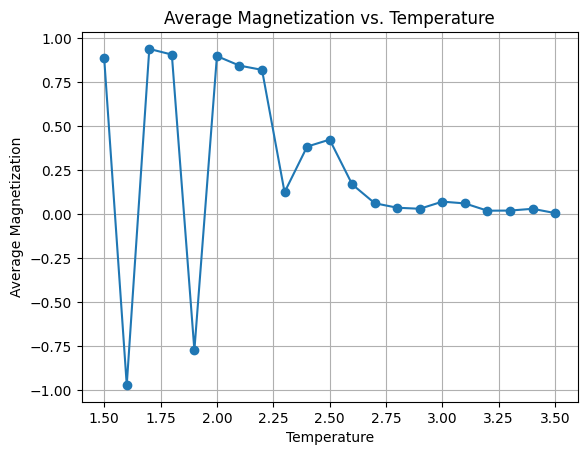

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class IsingModel2D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def calculate_energy_change(self, i, j):
        top = self.spins[(i-1)%self.size, j]
        bottom = self.spins[(i+1)%self.size, j]
        left = self.spins[i, (j-1)%self.size]
        right = self.spins[i, (j+1)%self.size]
        neighbor_sum = top + bottom + left + right

        # 교환 상호작용과 외부 자기장을 고려한 에너지 변화 계산
        delta_energy = 2 * self.spins[i, j] * (self.exchange_interaction * neighbor_sum + self.external_field)
        return delta_energy

    def metropolis_step(self):
        for _ in range(self.size**2):  # 격자 내 모든 스핀에 대해 한 번씩 시도
            i, j = random.randint(0, self.size-1), random.randint(0, self.size-1)
            delta_energy = self.calculate_energy_change(i, j)
            if delta_energy < 0 or random.random() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j] *= -1

    def simulate(self, steps):
        magnetizations = []
        for step in range(steps):
            self.metropolis_step()

            magnetization = np.mean(self.spins)
            magnetizations.append(magnetization)
        return magnetizations

# 시뮬레이션 매개변수
size = 20
temperatures = np.linspace(1.5, 3.5, 21)
external_field = 0.01  # 외부 자기장
exchange_interaction = 1  # 교환 상호작용 상수
steps = 1000


magnetizations_vs_temperature = []

for temperature in temperatures:
    model = IsingModel2D(size, temperature, external_field, exchange_interaction)
    magnetizations = model.simulate(steps)
    avg_magnetization = np.mean(magnetizations)
    magnetizations_vs_temperature.append(avg_magnetization)

# 그래프 그리기
plt.plot(temperatures, magnetizations_vs_temperature, marker='o', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature')
plt.grid(True)
plt.show()


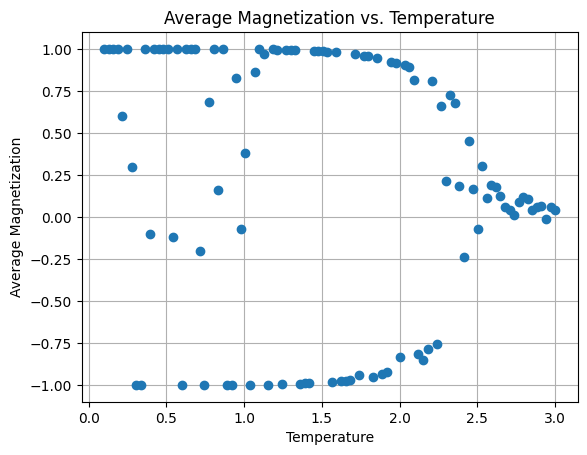

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

class IsingModel2D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def calculate_energy_change(self, i, j):
        top = self.spins[(i-1)%self.size, j]
        bottom = self.spins[(i+1)%self.size, j]
        left = self.spins[i, (j-1)%self.size]
        right = self.spins[i, (j+1)%self.size]
        neighbor_sum = top + bottom + left + right

        # 교환 상호작용과 외부 자기장을 고려한 에너지 변화 계산
        delta_energy = 2 * self.spins[i, j] * (self.exchange_interaction * neighbor_sum + self.external_field)
        return delta_energy

    def metropolis_step(self):
        for _ in range(self.size**2):  # 격자 내 모든 스핀에 대해 한 번씩 시도
            i, j = random.randint(0, self.size-1), random.randint(0, self.size-1)
            delta_energy = self.calculate_energy_change(i, j)
            if delta_energy < 0 or random.random() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j] *= -1

    def simulate(self, steps, equilibration_steps):
            magnetizations = []

            for step in range(steps+equilibration_steps):
                self.metropolis_step()
                if step >= equilibration_steps:  # 평형화 단계 이후 자화 계산
                    magnetization = np.mean(self.spins)
                    magnetizations.append(magnetization)
            return magnetizations

# 시뮬레이션 매개변수
size = 20
temperatures = np.linspace(0.1, 3.0, 100)
external_field = 0.01  # 외부 자기장
exchange_interaction = 1  # 교환 상호작용 상수
steps = 1000
equilibration_steps=100

magnetizations_vs_temperature = []

for temperature in temperatures:
    model = IsingModel2D(size, temperature, external_field, exchange_interaction)
    magnetizations = model.simulate(steps,equilibration_steps)
    avg_magnetization = np.mean(magnetizations)
    magnetizations_vs_temperature.append(avg_magnetization)

# 그래프 그리기
plt.plot(temperatures, magnetizations_vs_temperature, marker='o', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature')
plt.grid(True)
plt.show()#5minuits 58seconds (20^2)*(10^3)*100=40,000,000 , 4천만번 계산

In [ ]:
'''
steps + equilibration_steps로 전체 스텝 수를 설정하는 방식과 단순히 steps만을 사용하는 방식 사이에는 중요한 차이가 있습니다.
이 차이는 시뮬레이션에서 데이터 수집하는 방식과 평형화 과정을 어떻게 처리할지에 대한 접근 방식에 기인합니다.

steps + equilibration_steps 사용하는 이유:
명확한 분리: total_steps = steps + equilibration_steps 방식은 평형화 과정(equilibration_steps)과 데이터 수집 과정(steps)을 명확하게 분리합니다.
이는 총 시뮬레이션 시간(total_steps) 내에서 먼저 평형화를 위한 충분한 시간을 할애한 다음, 이후에 실제 데이터 수집을 시작한다는 명확한 의도를 가집니다.

정확한 데이터 수집 기간: 이 방식을 사용하면, 사용자가 지정한 steps 수만큼 정확하게 데이터 수집을 진행합니다.
즉, 데이터 수집에 사용되는 스텝 수는 사용자가 의도한 대로 steps이 됩니다. equilibration_steps는 단지 시스템을 평형 상태로 이끌기 위한 준비 과정으로만 사용됩니다.

유연성: 사용자가 평형화 과정과 데이터 수집 과정을 독립적으로 조정할 수 있는 유연성을 제공합니다. 이는 다양한 시뮬레이션 시나리오에서 유용하게 사용될 수 있습니다.

단순히 steps만 사용하는 방식:
이 방식에서 equilibration_steps는 steps 내에 포함되어 있으므로, 실제 데이터를 수집하는 스텝 수는 steps - equilibration_steps가 됩니다.
이 접근 방식은 steps를 전체 스텝 수로 간주하고, 그 중 일부를 평형화에 사용하는 것입니다.

결과적으로, 이 방식은 사용자가 steps를 설정할 때, 평형화 과정을 고려해야 합니다.
즉, 충분한 데이터 수집을 위해 steps 값을 조정해야 할 수도 있습니다.

이 방식은 코드를 더 단순하게 만들 수 있지만, 사용자가 steps와 equilibration_steps의 관계를 항상 염두에 두어야 하는 부담을 줄 수 있습니다.

결론적으로, steps + equilibration_steps를 사용하는 방식은 시뮬레이션의 각 단계를 더 명확하게 구분하고,
사용자가 의도한 대로 정확한 수의 데이터 수집 스텝을 보장합니다. 이는 특히 연구 목적이나 상세한 시뮬레이션 분석을 수행할 때 중요한 이점을 제공할 수 있습니다.
'''